In [2]:
# Importing necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import gdown

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("taruntiwarihp/phishing-site-urls")

print("Path to dataset files:", path)

100%|██████████| 9.03M/9.03M [00:00<00:00, 157MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/taruntiwarihp/phishing-site-urls/versions/1


In [4]:
import os

# List all files in the dataset folder
dataset_path = path  # from your previous print statement
print(os.listdir(dataset_path))

['phishing_site_urls.csv']


In [5]:
df = pd.read_csv(os.path.join(dataset_path, 'phishing_site_urls.csv'))

# Preview the data
df.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [6]:
df.shape

(549346, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [8]:
df.isnull().sum()

,0
URL,0
Label,0


In [9]:
df.Label.value_counts()

,count
Label,
good,392924
bad,156422


In [10]:
from nltk.tokenize import RegexpTokenizer
tokenizer= RegexpTokenizer(r'[A-Za-z0-9]+')
df.URL.apply(lambda x: tokenizer.tokenize(x))


,URL
0,"[nobell, it, 70ffb52d079109dca5664cce6f3173737..."
1,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin..."
2,"[serviciosbys, com, paypal, cgi, bin, get, int..."
3,"[mail, printakid, com, www, online, americanex..."
4,"[thewhiskeydregs, com, wp, content, themes, wi..."
...,...
549341,"[23, 227, 196, 215]"
549342,"[apple, checker, org]"
549343,"[apple, iclods, org]"
549344,"[apple, uptoday, org]"


In [11]:
# prompt: cleand and preprocess the data

import re

def remove_unwanted_characters(url):
  """Removes characters like @,#,$ from the URL."""
  return re.sub(r'[@#$]', '', url)

def to_lowercase(url):
  """Converts the URL to lowercase."""
  return url.lower()

# Apply the cleaning and preprocessing steps
df['cleaned_url'] = df['URL'].apply(remove_unwanted_characters)
df['cleaned_url'] = df['cleaned_url'].apply(to_lowercase)
df['cleaned_url_tokens'] = df['cleaned_url'].apply(lambda x: tokenizer.tokenize(x))

# Display the cleaned data (optional)
print(df[['URL', 'cleaned_url', 'cleaned_url_tokens']].head())

                                                 URL  \
0  nobell.it/70ffb52d079109dca5664cce6f317373782/...   
1  www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...   
2  serviciosbys.com/paypal.cgi.bin.get-into.herf....   
3  mail.printakid.com/www.online.americanexpress....   
4  thewhiskeydregs.com/wp-content/themes/widescre...   

                                         cleaned_url  \
0  nobell.it/70ffb52d079109dca5664cce6f317373782/...   
1  www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...   
2  serviciosbys.com/paypal.cgi.bin.get-into.herf....   
3  mail.printakid.com/www.online.americanexpress....   
4  thewhiskeydregs.com/wp-content/themes/widescre...   

                                  cleaned_url_tokens  
0  [nobell, it, 70ffb52d079109dca5664cce6f3173737...  
1  [www, dghjdgf, com, paypal, co, uk, cycgi, bin...  
2  [serviciosbys, com, paypal, cgi, bin, get, int...  
3  [mail, printakid, com, www, online, americanex...  
4  [thewhiskeydregs, com, wp, content, themes, wi..

In [12]:
# prompt: perform feature extraction using count vectorizer

# Create a CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the 'cleaned_url' column
X = vectorizer.fit_transform(df['cleaned_url'])

# Display the shape of the resulting feature matrix
print("Shape of the feature matrix:", X.shape)

# You can also inspect the vocabulary learned by the vectorizer
# print("Vocabulary:", vectorizer.get_feature_names_out()[:10]) # print first 10 words

Shape of the feature matrix: (549346, 528881)


In [13]:


import matplotlib.pyplot as plt
# Define features (X) and target (y)
y = df['Label']

# Split the data into training and testing sets
# Use a random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # Stratify to maintain label distribution

print("Shape of training features:", X_train.shape)
print("Shape of testing features:", X_test.shape)
print("Shape of training labels:", y_train.shape)
print("Shape of testing labels:", y_test.shape)






Shape of training features: (439476, 528881)
Shape of testing features: (109870, 528881)
Shape of training labels: (439476,)
Shape of testing labels: (109870,)



--- Random Forest with CountVectorizer (Small Dataset) ---
Random Forest (CountVectorizer) Performance:
Accuracy: 0.8519159006098116
Precision: 0.8657295201163354
Recall: 0.5695153061224489
F1 Score: 0.6870552029236392
ROC AUC Score: 0.8493902050694178


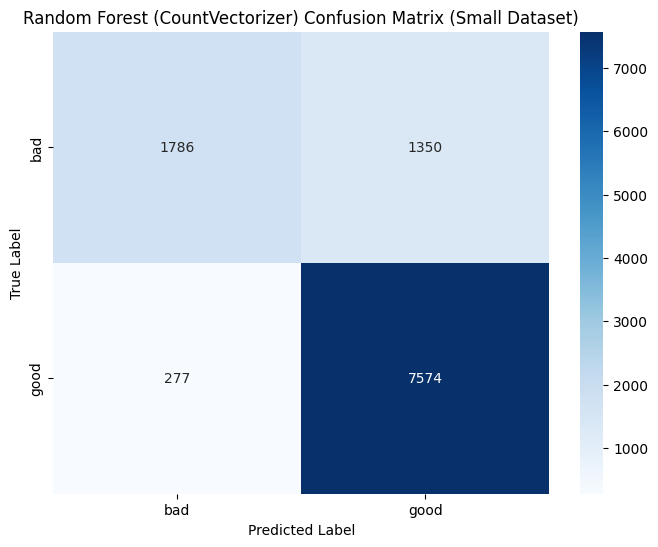


Classification Report:
               precision    recall  f1-score   support

         bad       0.87      0.57      0.69      3136
        good       0.85      0.96      0.90      7851

    accuracy                           0.85     10987
   macro avg       0.86      0.77      0.80     10987
weighted avg       0.85      0.85      0.84     10987


--- Random Forest with TF-IDF Vectorizer (Small Dataset) ---
Random Forest (TF-IDF Vectorizer) Performance:
Accuracy: 0.847729134431601
Precision: 0.8601674052191038
Recall: 0.5570790816326531
F1 Score: 0.6762144377782079
ROC AUC Score: 0.8441615027268072


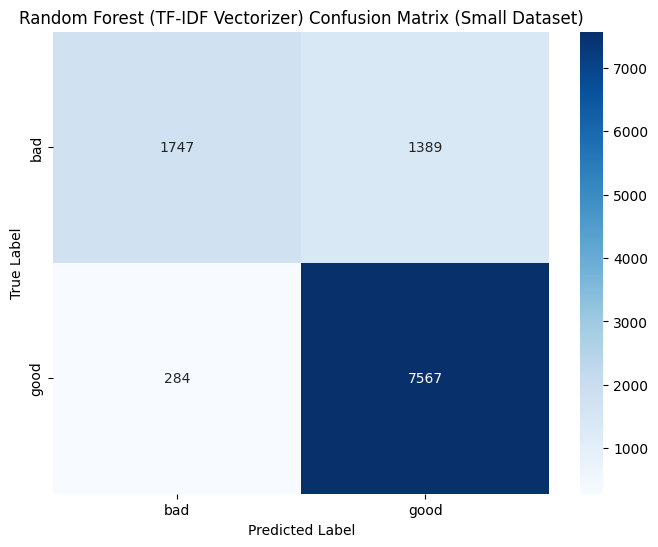


Classification Report:
               precision    recall  f1-score   support

         bad       0.86      0.56      0.68      3136
        good       0.84      0.96      0.90      7851

    accuracy                           0.85     10987
   macro avg       0.85      0.76      0.79     10987
weighted avg       0.85      0.85      0.84     10987



In [14]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Take a smaller portion of the dataset
df_small = df.sample(frac=0.1, random_state=42) # Use 10% of the data

# Define features (X) and target (y) for the smaller dataset
X_small = df_small['cleaned_url']
y_small = df_small['Label']

# Apply CountVectorizer with min_df set to 1000 (tokens that appear in at least 1000 documents)
count_vectorizer_small = CountVectorizer(min_df=1000)
X_count_small = count_vectorizer_small.fit_transform(X_small)

# Apply TfidfVectorizer with min_df set to 1000
tfidf_vectorizer_small = TfidfVectorizer(min_df=1000)
X_tfidf_small = tfidf_vectorizer_small.fit_transform(X_small)

# Split the data for CountVectorizer features
X_train_count_small, X_test_count_small, y_train_small, y_test_small = train_test_split(X_count_small, y_small, test_size=0.2, random_state=42, stratify=y_small)

# Split the data for TfidfVectorizer features
X_train_tfidf_small, X_test_tfidf_small, y_train_small_tfidf, y_test_small_tfidf = train_test_split(X_tfidf_small, y_small, test_size=0.2, random_state=42, stratify=y_small)


# --- Random Forest with CountVectorizer features ---
print("\n--- Random Forest with CountVectorizer (Small Dataset) ---")

# Create a Random Forest model with 30 estimators
rf_count_small = RandomForestClassifier(n_estimators=30, random_state=42, n_jobs=-1)

# Train the model
rf_count_small.fit(X_train_count_small, y_train_small)

# Make predictions
y_pred_rf_count_small = rf_count_small.predict(X_test_count_small)
y_prob_rf_count_small = rf_count_small.predict_proba(X_test_count_small)[:, 1]

# Evaluate the model
print("Random Forest (CountVectorizer) Performance:")
print("Accuracy:", accuracy_score(y_test_small, y_pred_rf_count_small))
print("Precision:", precision_score(y_test_small, y_pred_rf_count_small, pos_label='bad'))
print("Recall:", recall_score(y_test_small, y_pred_rf_count_small, pos_label='bad'))
print("F1 Score:", f1_score(y_test_small, y_pred_rf_count_small, pos_label='bad'))
print("ROC AUC Score:", roc_auc_score(y_test_small, y_prob_rf_count_small))

# Confusion Matrix
cm_rf_count_small = confusion_matrix(y_test_small, y_pred_rf_count_small)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_count_small, annot=True, fmt='d', cmap='Blues', xticklabels=['bad', 'good'], yticklabels=['bad', 'good'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest (CountVectorizer) Confusion Matrix (Small Dataset)')
plt.show()

# Classification Report
print("\nClassification Report:\n", classification_report(y_test_small, y_pred_rf_count_small))


# --- Random Forest with TF-IDF Vectorizer features ---
print("\n--- Random Forest with TF-IDF Vectorizer (Small Dataset) ---")

# Create a Random Forest model with 30 estimators
rf_tfidf_small = RandomForestClassifier(n_estimators=30, random_state=42, n_jobs=-1)

# Train the model
rf_tfidf_small.fit(X_train_tfidf_small, y_train_small_tfidf)

# Make predictions
y_pred_rf_tfidf_small = rf_tfidf_small.predict(X_test_tfidf_small)
y_prob_rf_tfidf_small = rf_tfidf_small.predict_proba(X_test_tfidf_small)[:, 1]

# Evaluate the model
print("Random Forest (TF-IDF Vectorizer) Performance:")
print("Accuracy:", accuracy_score(y_test_small_tfidf, y_pred_rf_tfidf_small))
print("Precision:", precision_score(y_test_small_tfidf, y_pred_rf_tfidf_small, pos_label='bad'))
print("Recall:", recall_score(y_test_small_tfidf, y_pred_rf_tfidf_small, pos_label='bad'))
print("F1 Score:", f1_score(y_test_small_tfidf, y_pred_rf_tfidf_small, pos_label='bad'))
print("ROC AUC Score:", roc_auc_score(y_test_small_tfidf, y_prob_rf_tfidf_small))

# Confusion Matrix
cm_rf_tfidf_small = confusion_matrix(y_test_small_tfidf, y_pred_rf_tfidf_small)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_tfidf_small, annot=True, fmt='d', cmap='Blues', xticklabels=['bad', 'good'], yticklabels=['bad', 'good'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest (TF-IDF Vectorizer) Confusion Matrix (Small Dataset)')
plt.show()

# Classification Report
print("\nClassification Report:\n", classification_report(y_test_small_tfidf, y_pred_rf_tfidf_small))
